In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
fb = pd.read_csv('../data/Facebook.csv')
amzn = pd.read_csv('../data/Amazon.csv')
aapl = pd.read_csv('../data/Apple.csv')
nflx = pd.read_csv('../data/Netflix.csv')
googl = pd.read_csv('../data/Google.csv')

# Add a column to identify the company
fb['Company'] = 'Facebook'
amzn['Company'] = 'Amazon'
aapl['Company'] = 'Apple'
nflx['Company'] = 'Netflix'
googl['Company'] = 'Google'

# Combine all data into a single DataFrame
df = pd.concat([fb, amzn, aapl, nflx, googl], ignore_index=True)

# Display the first few rows of the combined data
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400.0,Facebook
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700.0,Facebook
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600.0,Facebook
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000.0,Facebook
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200.0,Facebook
5,2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800.0,Facebook
6,2012-05-29,31.480000,31.690001,28.650000,28.840000,28.840000,78063400.0,Facebook
7,2012-05-30,28.700001,29.549999,27.860001,28.190001,28.190001,57267900.0,Facebook
8,2012-05-31,28.549999,29.670000,26.830000,29.600000,29.600000,111639200.0,Facebook
9,2012-06-01,28.889999,29.150000,27.389999,27.719999,27.719999,41855500.0,Facebook


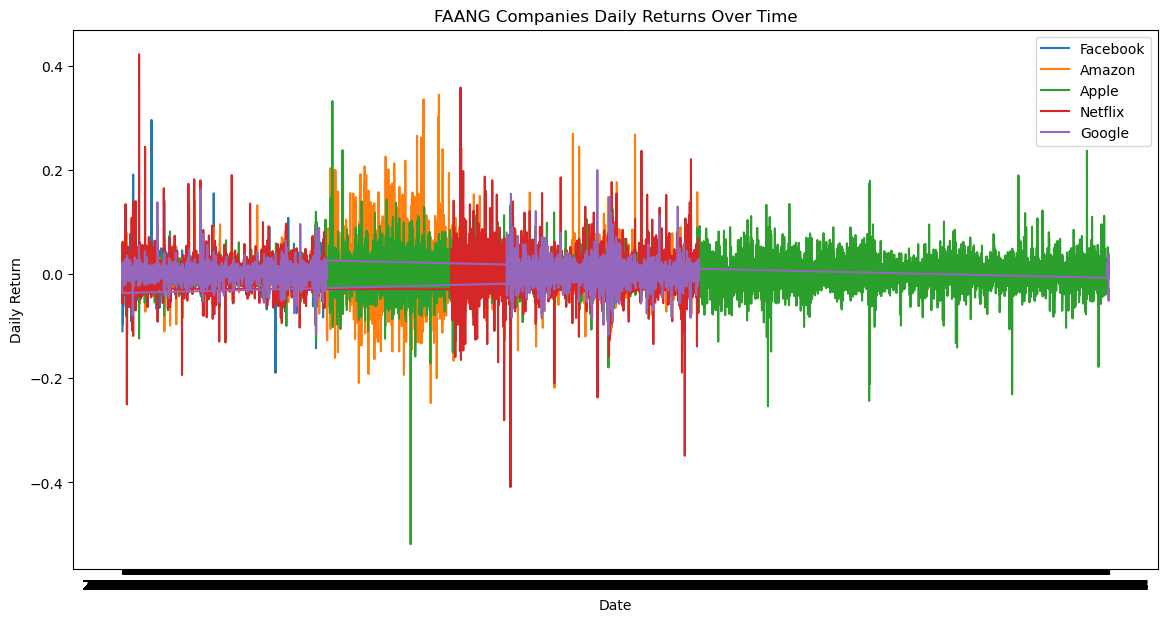

In [3]:
# Calculate daily returns
df['Daily_Return'] = df.groupby('Company')['Close'].transform(lambda x: x.pct_change(fill_method=None))

# Plot daily returns
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Daily_Return'], label=company)

plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('FAANG Companies Daily Returns Over Time')
plt.legend()
plt.show()


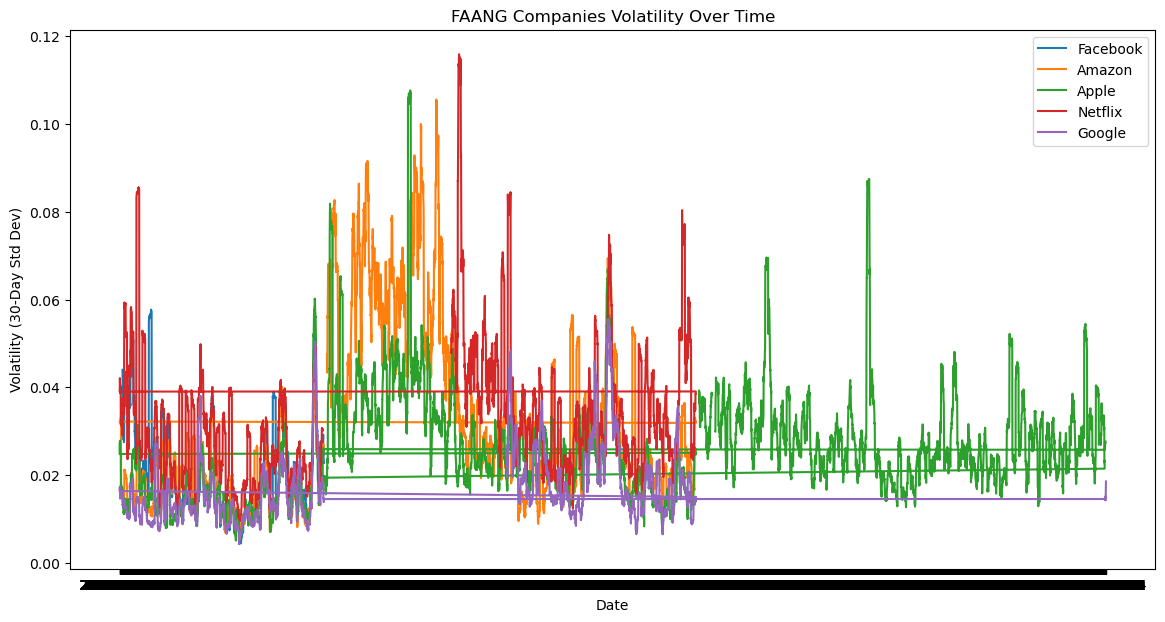

In [4]:
# Calculate rolling standard deviation (volatility)
df['Volatility'] = df.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=30).std())

# Plot volatility
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Volatility'], label=company)

plt.xlabel('Date')
plt.ylabel('Volatility (30-Day Std Dev)')
plt.title('FAANG Companies Volatility Over Time')
plt.legend()
plt.show()


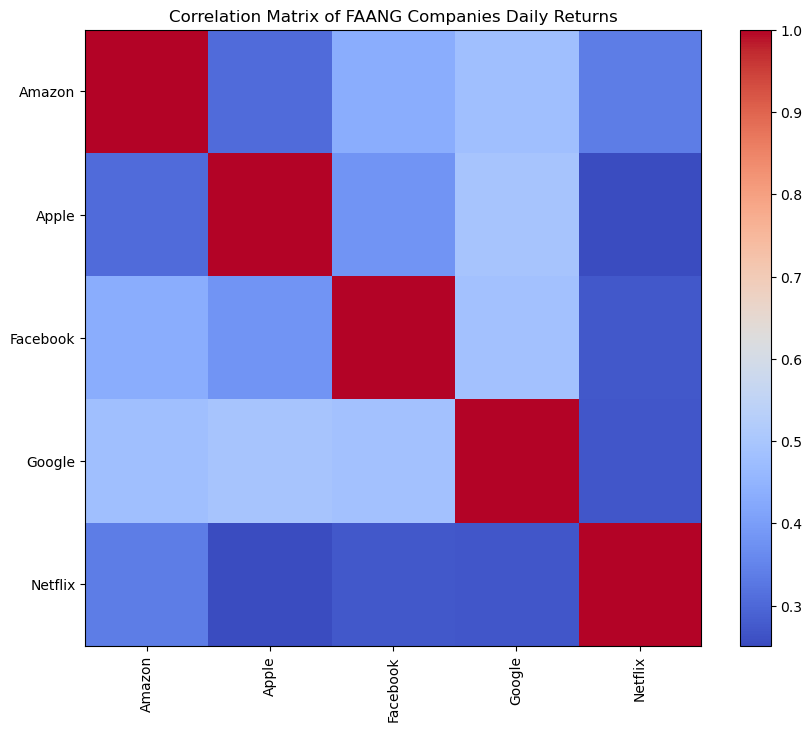

In [5]:
# Pivot the DataFrame to have dates as rows and companies as columns
returns_pivot = df.pivot(index='Date', columns='Company', values='Daily_Return')

# Calculate the correlation matrix
correlation_matrix = returns_pivot.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix of FAANG Companies Daily Returns')
plt.show()
